# Assignment for Unit 2 content

This exercise is intended to help you become familiar with the tools and libraries that you will be using throughout research and this VIP class. You can use the following resources to help you!

- *https://huggingface.co/learn/audio-course/chapter2/audio_classification_pipeline*
- *https://huggingface.co/learn/audio-course/chapter2/asr_pipeline*
- The other notebooks in this repo on audio and datasets

Your task is:
1. Use Datasets to load the train split of the facebook/voxpopuli dataset in language of your choice in streaming mode.
2. Get the third example from the train part of the dataset and explore it. Given the features that this example has, write at least 3 kinds of audio tasks you can perform with this dataset.
3. Plot this example’s waveform and spectrogram.
4. Go to HuggingFace Hub, explore pretrained models and find one that can be used for automatic speech recognition for the language that you have picked earlier. Instantiate a corresponding pipeline with the model you found, and transcribe the example.
5. Write a few sentences comparing the transcription that you get from the pipeline to the transcription provided in the example.

If you struggle with this exercise, feel free to take a peek at an example solution here: *https://colab.research.google.com/drive/1NGyo5wFpRj8TMfZOIuPaJHqyyXCITftc?usp=sharing*.

Discovered something interesting? Found a cool model? Got a beautiful spectrogram? Post about your work in the group Teams chat!

In [ ]:
!pip install datasets[audio]

In [16]:
from datasets import load_dataset

vox = load_dataset("facebook/voxpopuli", name="sl", split="train")
example = vox[2]

In [17]:
example

{'audio_id': '20160913-0900-PLENARY-19-sl_20160913-21:19:36_7',
 'language': 13,
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/a4f832636f8506b3f9701fd0fb66e12849c0b126775ab1eba1422659970a394c/train_part_0/20160913-0900-PLENARY-19-sl_20160913-21:19:36_7.wav',
  'array': array([ 0.05493164,  0.04788208,  0.04141235, ...,  0.00143433,
         -0.00714111, -0.0223999 ]),
  'sampling_rate': 16000},
 'raw_text': 'To je seveda nesprejemljivo.',
 'normalized_text': 'to je seveda nesprejemljivo.',
 'gender': 'female',
 'speaker_id': '125104',
 'is_gold_transcript': True,
 'accent': 'None'}

2) Given the sampling_rate and array of the audio sample, we can produce a graph of its waveform, a frequency spectogram to view the most prominent frequencies/notes, and a mel-spectrogram to gain a more humanistic representation of the audio sample.

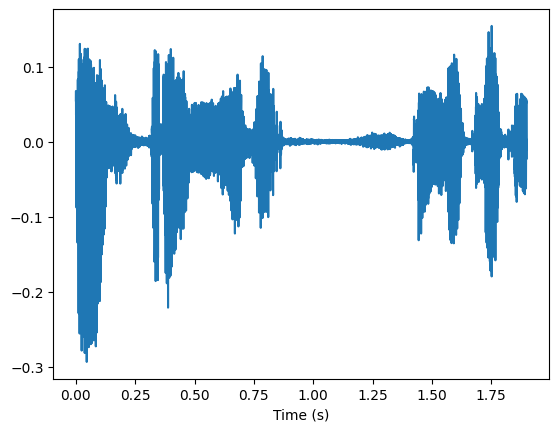

In [12]:
#waveform graph
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
time = np.linspace(0, len(example['audio']['array'])/example['audio']['sampling_rate'], num=len(example['audio']['array']))  # Creates a list of linearly increasing numbers, with the nth entry containing the time of the nth sample in seconds
plt.plot(time, example['audio']['array'])  # Plot the time array on the x-axis and the sound array on the y-axis
plt.xlabel("Time (s)")
plt.show()

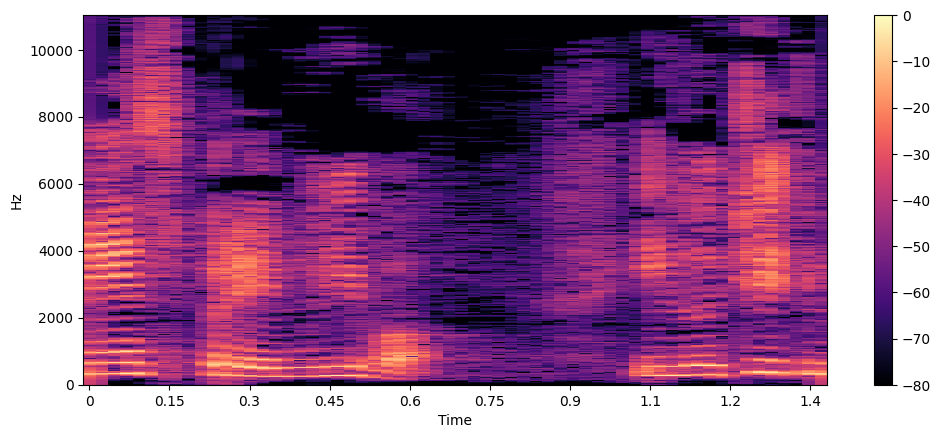

In [14]:
#spectogram
import librosa  # For manipulating audio
D = librosa.stft(example['audio']['array'])
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

In [18]:
!pip install git+https://github.com/huggingface/transformers.git sentencepiece


  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-6gro3ny9
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-6gro3ny9
  Resolved https://github.com/huggingface/transformers.git to commit 772307be7649e1333a933cfaa229dc0dec2fd331
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.8 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.37.0.dev0-py3-none-any.whl size=8395842 sha256=53e45a4ca022c114c3200cbb952862c0315824b21a426144362ce984201cdcdd
  Stored in directory: /tmp/pip-ephem-wheel-cache-w2ya07rm/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
 

In [19]:
from transformers import AutoProcessor, SeamlessM4Tv2Model
import torchaudio

processor = AutoProcessor.from_pretrained("facebook/seamless-m4t-v2-large")
model = SeamlessM4Tv2Model.from_pretrained("facebook/seamless-m4t-v2-large")

# from text
text_inputs = processor(text = "Hello, my dog is cute", src_lang="eng", return_tensors="pt")
audio_array_from_text = model.generate(**text_inputs, tgt_lang="slk")[0].cpu().numpy().squeeze()

# from audio
audio, orig_freq =  torchaudio.load("https://www2.cs.uic.edu/~i101/SoundFiles/preamble10.wav")
audio =  torchaudio.functional.resample(audio, orig_freq=orig_freq, new_freq=16_000) # must be a 16 kHz waveform array
audio_inputs = processor(audios=audio, return_tensors="pt")
audio_array_from_audio = model.generate(**audio_inputs, tgt_lang="slk")[0].cpu().numpy().squeeze()


/usr/local/lib/python3.10/dist-packages/transformers/deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.17M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.07k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.34k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/2.72k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/211k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.24G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/9.91M [00:00<?, ?B/s]

It is strongly recommended to pass the `sampling_rate` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
